In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
X = data['data']
Y = data['target']
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [4]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        return torch.sigmoid(x)

    
model = LogisticRegression(X.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
EPOCHS = 100


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
X_train, X_test = torch.Tensor(X_train).view(-1, X.shape[1]), torch.Tensor(X_test).view(-1, X.shape[1])
y_train, y_test = torch.Tensor(y_train).view(-1, 1), torch.Tensor(y_test).view(-1,1)

In [7]:
print(X_train.shape)
print(y_train.shape)

torch.Size([455, 30])
torch.Size([455, 1])


In [8]:
model.train()
losses = []
for epoch in range(EPOCHS):
    y_hat = model.forward(X_train)
    optimizer.zero_grad()
    loss = criterion(y_hat, y_train)
    assert y_hat.shape == y_train.shape
    loss.backward()
    optimizer.step()
#     print(loss.item())
#     print(torch.sum(y_hat==y_train).item()/X_train.shape[0])
    losses.append(loss.item())

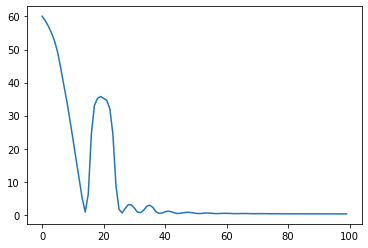

In [9]:
plt.plot(losses)

In [10]:
model.eval()
with torch.no_grad():
    y_hat = torch.round(model.forward(X_test))
    print(torch.sum(y_hat==y_test).item()/X_test.shape[0])

0.8859649122807017
